# Clustering - Class 1

## Author:  Ricardo Vallejo

## 1. Load Data

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("DataClustering.xls")
display(df)

print('DATA information:')
display(df.info())


,X1,X2,X3,X4
0,4.3,3.0,1.1,0.1
1,4.4,2.9,1.4,0.2
2,4.4,3.0,1.3,0.2
3,4.4,3.2,1.3,0.2
4,4.5,2.3,1.3,0.3
...,...,...,...,...
145,7.7,3.8,6.7,2.2
146,7.7,2.6,6.9,2.3
147,7.7,2.8,6.7,2.0
148,7.7,3.0,6.1,2.3


DATA information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      150 non-null    float64
 1   X2      150 non-null    float64
 2   X3      150 non-null    float64
 3   X4      150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


None

## Identification de characteristics

In [19]:
X = df[['X3', 'X4']].values
fn = ['X3', 'X4']

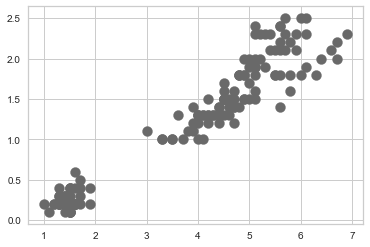

In [60]:
fig = plt.figure(figsize=(6,4))
plt.scatter(df[['X3']], df[['X4']], s=100, c='dimgray', label='Scatter plot')

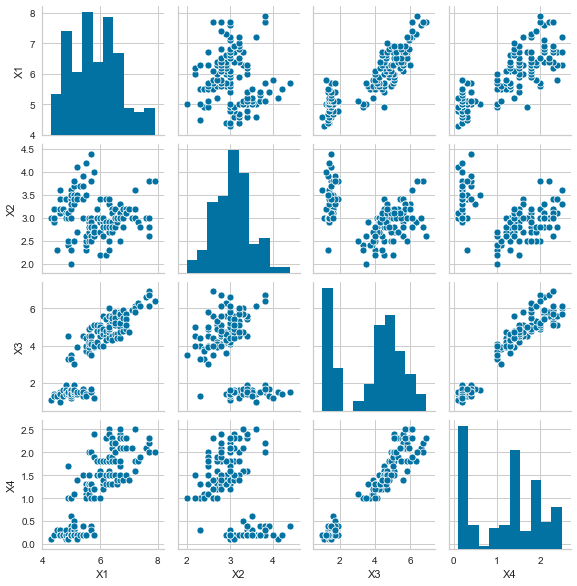

In [59]:
sns.pairplot(df, height = 2, palette = 'colorblind');

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


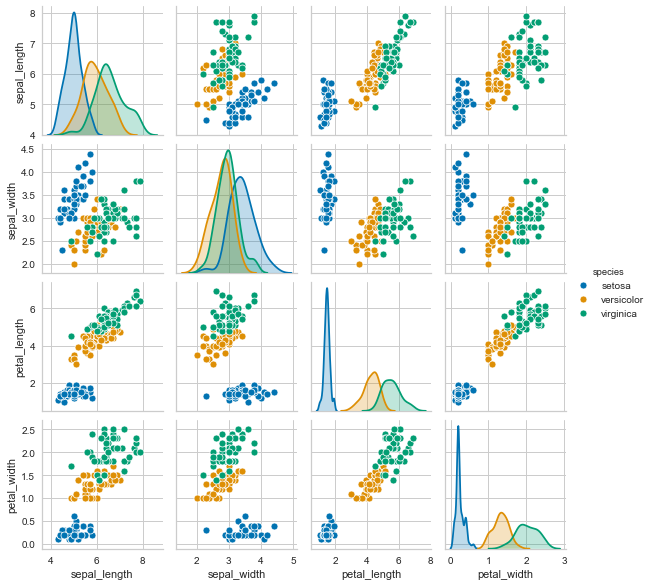

In [21]:
#Iris remember... and i dont know species data

dataIris = pd.read_csv("iris.csv")
display(dataIris)
sns.pairplot(dataIris, hue="species", height = 2, palette = 'colorblind');
plt.show()

# Cluster Model using kMeans and df [x3,x4]

In [22]:
from sklearn.cluster import KMeans

KC = 3
kmeans = KMeans(n_clusters = KC, init = 'random', max_iter=400, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(X)
display(y_kmeans)# ==> Groups trouved by my classificator = Clustering
print(y_kmeans.shape)
#y_kmeans take values 0,1,2 when KC=3


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

(150,)


## Verification model

In [98]:
# inertia on the fitted data - Let’s evaluate how well the formed clusters are
kmeans.inertia_

31.387758974358977

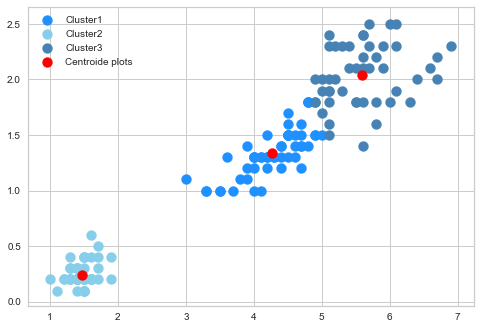

In [23]:

#0 et 1 pour indexer X3, X4

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='dodgerblue', label='Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='skyblue', label='Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='steelblue', label='Cluster3')

#Plotting centroids of clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c = 'red', label = 'Centroide plots')
plt.legend()


# Moyenne de la silhouette - Diagram de elbow

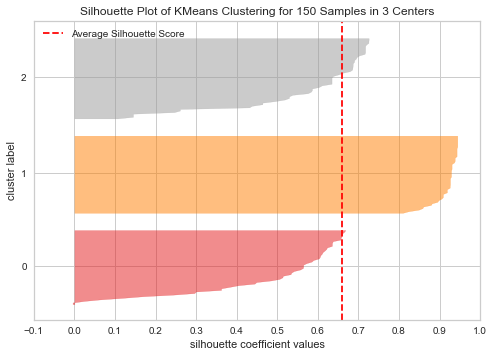

In [24]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

# https://www.scikit-yb.org/en/latest/  ===>Yellowbrick: Machine Learning Visualization

model = SilhouetteVisualizer(KMeans(KC))
model.fit(X)
model.show()

# Elbow value

In [29]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

sum_of_squared_distances = []
K=range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)
    

k1 = KneeLocator(range(1,15), sum_of_squared_distances, curve='convex', direction='decreasing')
print('The value of Elbow is:  ', k1.elbow)

# Number of classes ideals a classifier avec le set de donnes X3, X4
# the cluster value where this decrease in inertia value becomes constant can be chosen as the right cluster value for our data.



The value of Elbow is:   3


## Diagram de code

Text(0, 0.5, 'Inertia')

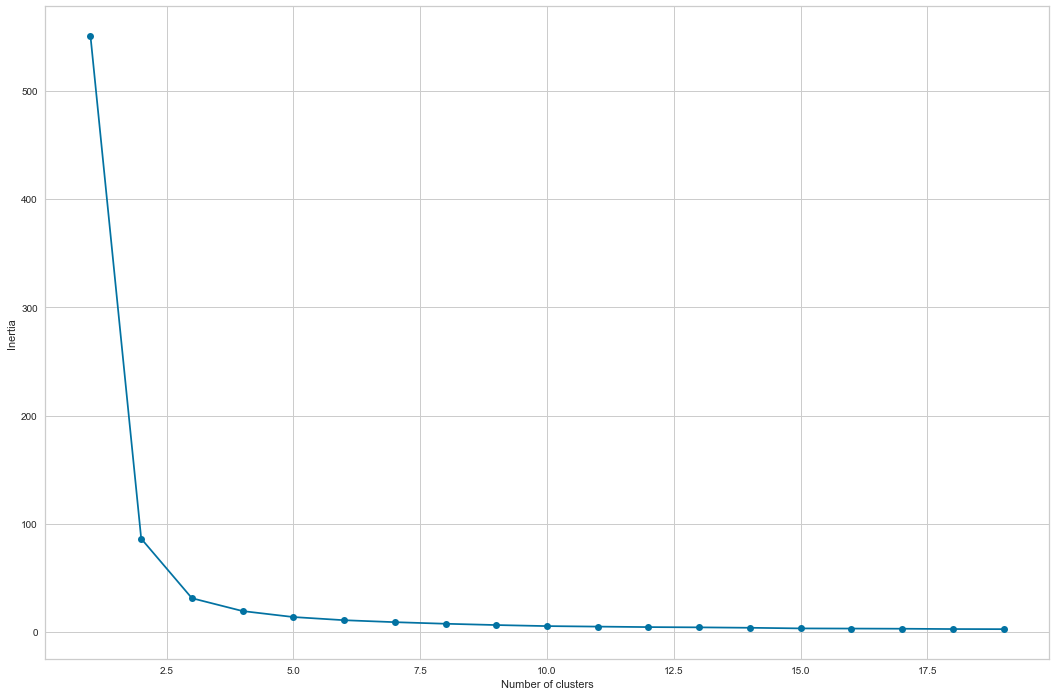

In [100]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(18,12))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [118]:
 # The number of iterations required to converge
print('kmeans.n_iter_',kmeans.n_iter_)
print('kmeans.cluster_centers_ \n',kmeans.cluster_centers_)
print('kmeans.inertia_',kmeans.inertia_)

kmeans.n_iter_ 5
kmeans.cluster_centers_ 
 [[4.92525253 1.68181818]
 [1.49411765 0.26078431]]
kmeans.inertia_ 86.40394533571003


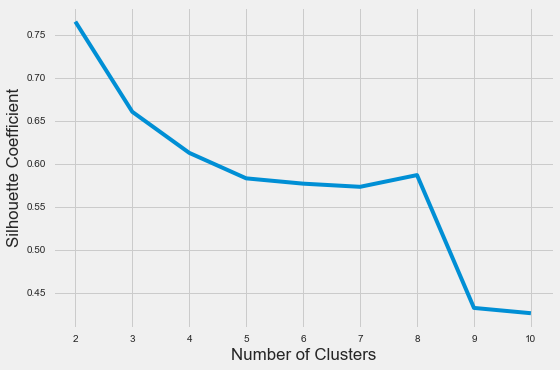

In [124]:
# Usinng Coefficient of Sihouette

from sklearn.metrics import silhouette_score

kmeans_kwargs = {
"init": "random",
"n_init": 10,
 "max_iter": 300,
 "random_state": 42,
}

silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()


# Debugging problem for install modules

In [26]:
!jupyter kernelspec list


Available kernels:
  anaconda-base    C:\Users\valm044\AppData\Roaming\jupyter\kernels\anaconda-base
  python3          C:\Users\valm044\Anaconda3\share\jupyter\kernels\python3


In [27]:
!jupyter kernelspec list --json #"C:/Users/valm044/Anaconda3\\python.exe", pyton pour jupyter 

{
  "kernelspecs": {
    "anaconda-base": {
      "resource_dir": "C:\\Users\\valm044\\AppData\\Roaming\\jupyter\\kernels\\anaconda-base",
      "spec": {
        "argv": [
          "C:\\Users\\valm044\\Anaconda3\\python.exe",
          "-m",
          "ipykernel_launcher",
          "-f",
          "{connection_file}"
        ],
        "env": {},
        "display_name": "Anaconda (base)",
        "language": "python",
        "interrupt_mode": "signal",
        "metadata": {}
      }
    },
    "python3": {
      "resource_dir": "C:\\Users\\valm044\\Anaconda3\\share\\jupyter\\kernels\\python3",
      "spec": {
        "argv": [
          "C:/Users/valm044/Anaconda3\\python.exe",
          "-m",
          "ipykernel_launcher",
          "-f",
          "{connection_file}"
        ],
        "env": {},
        "display_name": "Python 3",
        "language": "python",
        "interrupt_mode": "signal",
        "metadata": {}
      }
    }
  }
}


In [28]:
!which python # --> /c/Python/python-3.5.1/python  Default version of python in my system
!which -a python #--> All pythons installed --> /c/Python/python-3.5.1/python in my system
!C:/Users/valm044/Anaconda3\\python --version  #--> 3.7.6 in Anaconda
!C:/Python/python-3.5.1/python --version #--3.5.1


    
# I have to add my local environmnet or anothers versions of python to jupyter and create their kernels




The system cannot find the path specified.
The system cannot find the path specified.


Python 3.5.1


# Including all characteristics df [x1,x2,x3,x4] DATA

In [32]:
X2 = df[['X1', 'X2','X3', 'X4']].values
fn2 = ['X1', 'X2', 'X3', 'X4']

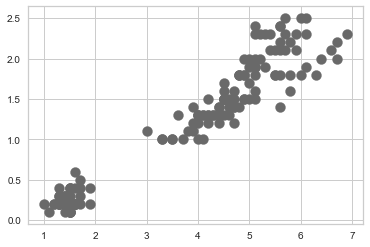

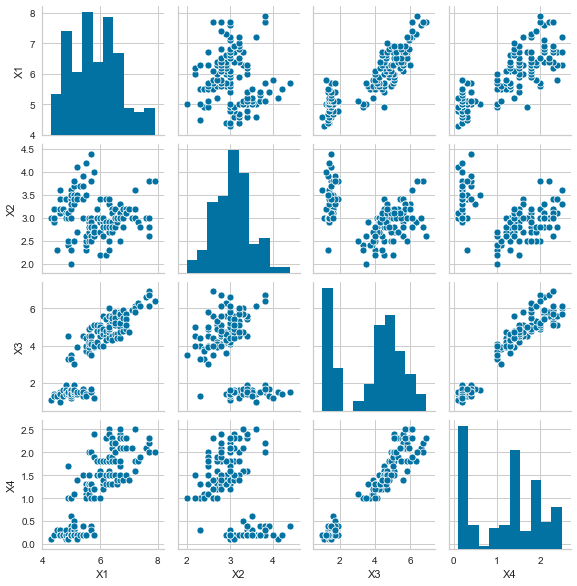

In [33]:
fig = plt.figure(figsize=(6,4))
plt.scatter(df[['X3']], df[['X4']], s=100, c='dimgray', label='Scatter plot')
sns.pairplot(df, height = 2, palette = 'colorblind');

# Clustering model

In [34]:
from sklearn.cluster import KMeans

KC = 3
kmeans2 = KMeans(n_clusters = KC, init = 'random', max_iter=400, n_init=10, random_state=0)
y_kmeans2=kmeans2.fit_predict(X2)
display(y_kmeans2)# ==> Groups trouved by my classificator = Clustering
print(y_kmeans2.shape)
#y_kmeans take values 0,1,2 when KC=3


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

(150,)


## With more descriptors interrealtion between them.

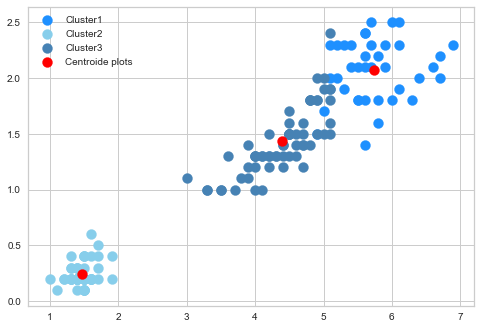

In [55]:
#Indexer  X3, X4

plt.scatter(X2[y_kmeans2 == 0, 2], X2[y_kmeans2 == 0, 3], s=100, c='dodgerblue', label='Cluster1')
plt.scatter(X2[y_kmeans2 == 1, 2], X2[y_kmeans2 == 1, 3], s=100, c='skyblue', label='Cluster2')
plt.scatter(X2[y_kmeans2 == 2, 2], X2[y_kmeans2 == 2, 3], s=100, c='steelblue', label='Cluster3')

#Plotting centroids of clusters
plt.scatter(kmeans2.cluster_centers_[:,2], kmeans2.cluster_centers_[:,3], s=100, c = 'red', label = 'Centroide plots')
plt.legend()


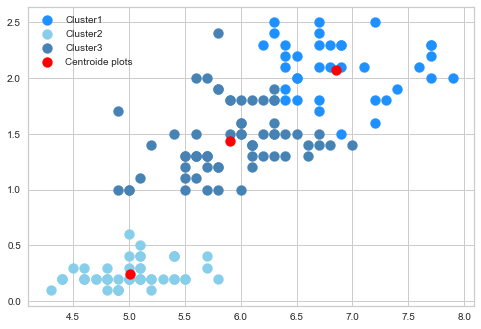

In [86]:
#Indexer  X1, X4

plt.scatter(X2[y_kmeans2 == 0, 0], X2[y_kmeans2 == 0, 3], s=100, c='dodgerblue', label='Cluster1')
plt.scatter(X2[y_kmeans2 == 1, 0], X2[y_kmeans2 == 1, 3], s=100, c='skyblue', label='Cluster2')
plt.scatter(X2[y_kmeans2 == 2, 0], X2[y_kmeans2 == 2, 3], s=100, c='steelblue', label='Cluster3')

#Plotting centroids of clusters
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,3], s=100, c = 'red', label = 'Centroide plots')
plt.legend()


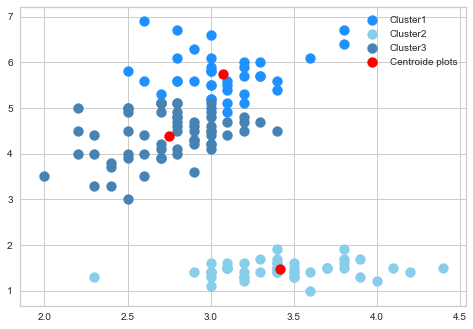

In [87]:
#Indexer  X2, X3

plt.scatter(X2[y_kmeans2 == 0, 1], X2[y_kmeans2 == 0, 2], s=100, c='dodgerblue', label='Cluster1')
plt.scatter(X2[y_kmeans2 == 1, 1], X2[y_kmeans2 == 1, 2], s=100, c='skyblue', label='Cluster2')
plt.scatter(X2[y_kmeans2 == 2, 1], X2[y_kmeans2 == 2, 2], s=100, c='steelblue', label='Cluster3')

#Plotting centroids of clusters
plt.scatter(kmeans2.cluster_centers_[:,1], kmeans2.cluster_centers_[:,2], s=100, c = 'red', label = 'Centroide plots')
plt.legend()

# Below Diagram and value

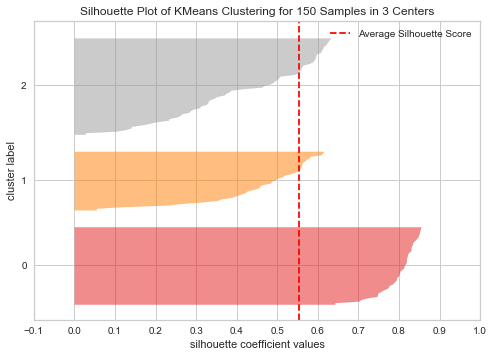

In [102]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

# https://www.scikit-yb.org/en/latest/  ===>Yellowbrick: Machine Learning Visualization

model = SilhouetteVisualizer(KMeans(KC))
model.fit(X2)
model.show()

#The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

#How close the data point is to other points in the cluster
#How far away the data point is from points in other clusters

In [103]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

sum_of_squared_distances2 = []
K=range(1,15)
for k in K:
    km2 = KMeans(n_clusters=k)
    km2 = km2.fit(X2)
    sum_of_squared_distances2.append(km2.inertia_)
    

k1 = KneeLocator(range(1,15), sum_of_squared_distances2, curve='convex', direction='decreasing')
print('The value of Elbow is:  ', k1.elbow)

# Number of classes ideals a classifier avec le set de donnes X3, X4

The value of Elbow is:   3


In [111]:
 # The number of iterations required to converge
print('kmeans.n_iter_',kmeans2.n_iter_)
print('kmeans.cluster_centers_ \n',kmeans2.cluster_centers_)
print('kmeans.inertia_',kmeans2.inertia_)

kmeans.n_iter_ 4
kmeans.cluster_centers_ 
 [[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
kmeans.inertia_ 78.94084142614601


In [105]:
kmeans2.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

Text(0, 0.5, 'Inertia')

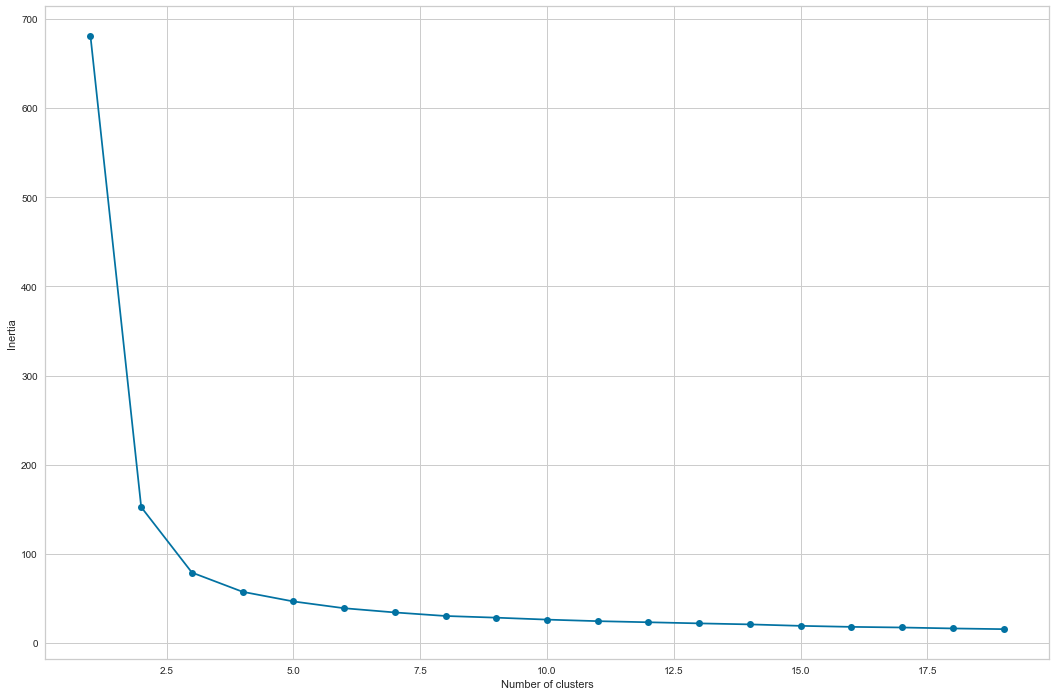

In [112]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(X2)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(18,12))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

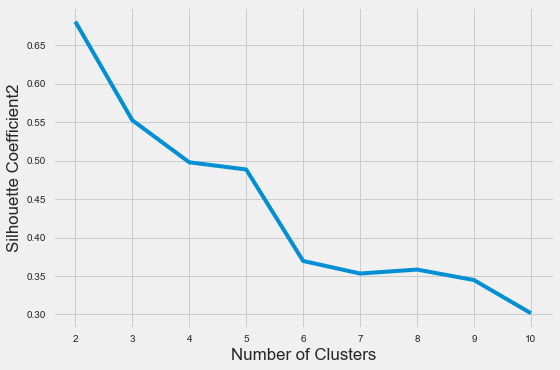

In [125]:
# Usinng Coefficient of Sihouette

from sklearn.metrics import silhouette_score

kmeans_kwargs = {
"init": "random",
"n_init": 10,
 "max_iter": 300,
 "random_state": 42,
}

silhouette_coefficients2 = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X2)
    score = silhouette_score(X2, kmeans.labels_)
    silhouette_coefficients2.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients2)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient2")
plt.show()